1Q) We know that the probability of rainy days in the month of October is 0.12452. Write a Python program to create a PMF of the binomial distribution of this data. Write the appropriate title, X and Y axis labels, legends and markers.

/var/folders/rw/6sr84b2936j44211cxrqpp8r0000gn/T/ipykernel_5082/3808962941.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pmf = np.array([np.math.comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in x])


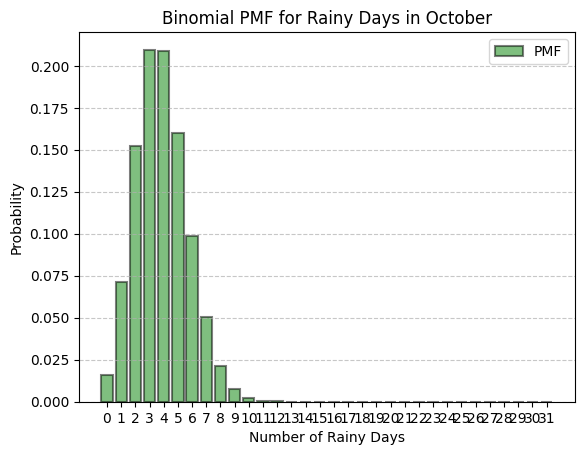

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the binomial distribution
p = 0.12452  # Probability of a rainy day
n = 31       # Number of days in October

# To Calculate the PMF for each possible number of rainy days (0 to 31)
x = np.arange(0, n+1)  # Number of rainy days
pmf = np.array([np.math.comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in x])

# Create the PMF plot
plt.bar(x, pmf, align='center', alpha=0.5, label='PMF', color='green', edgecolor='k', linewidth=1.5)

# Set the title and labels
plt.title('Binomial PMF for Rainy Days in October')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend()

# Show the plot
plt.show()

2Q) Write a python program to generate a PDF of a normally distributed function with range from 10 to 30 with standard deviation of 2

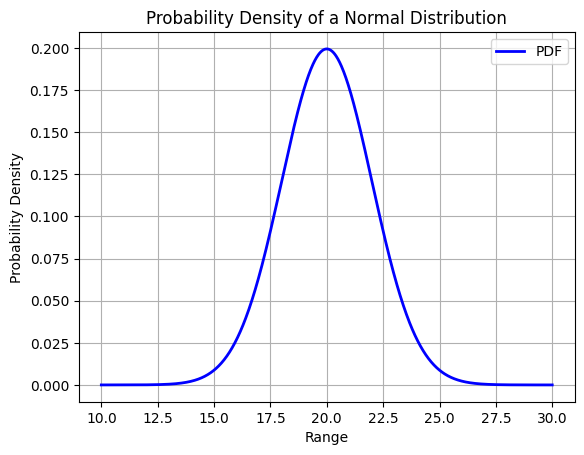

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 20  # Mean
sigma = 2  # Standard deviation
x = np.linspace(10, 30, 1000)  # Range from 10 to 30 with 1000 points

# Calculate the PDF using the normal distribution
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Create the PDF plot
plt.plot(x, pdf, color='b', label='PDF', linewidth=2)

# Set the title and labels
plt.title('Probability Density of a Normal Distribution')
plt.xlabel('Range')
plt.ylabel('Probability Density')
plt.grid()

# Add a legend
plt.legend()

# Show the plot or save it to a file
plt.show()
# To save the plot as a PDF file, uncomment and use the following line:
# plt.savefig('normal_distribution.pdf')


3Q) Suppose we have a deck of spade cards (13 cards), and one card is picked and put back into the deck, one more is picked and put back into the deck and one more is picked and put back into the deck. Write a Monte Carlo simulation where you run the simulation of this 3 card picks for 100 times. Calculate the probability of getting the same card for each pick 

In [3]:
import random

# Define the number of simulations and the number of cards in the deck
num_simulations = 100
num_cards = 13

# Initialize a variable to count the number of times the same card is picked
same_card_count = 0

# Perform the Monte Carlo simulation
for _ in range(num_simulations):
    # Generate three random picks with replacement
    picks = [random.randint(1, num_cards) for _ in range(3)]
    
    # Check if all three picks are the same card
    if picks[0] == picks[1] == picks[2]:
        same_card_count += 1

# Calculate the probability
probability = same_card_count / num_simulations

# Print the results
print(f"Number of Simulations: {num_simulations}")
print(f"Number of Times Same Card Picked: {same_card_count}")
print(f"Probability of Getting the Same Card for All 3 Picks: {probability:.2f}")


Number of Simulations: 100
Number of Times Same Card Picked: 1
Probability of Getting the Same Card for All 3 Picks: 0.01


4Q) Using the Boston Marathon data (bm_results2012.csv Download bm_results2012.csv), write a Python program that will sample 100 racers official time using random sampling and plot a histogram of the sample.

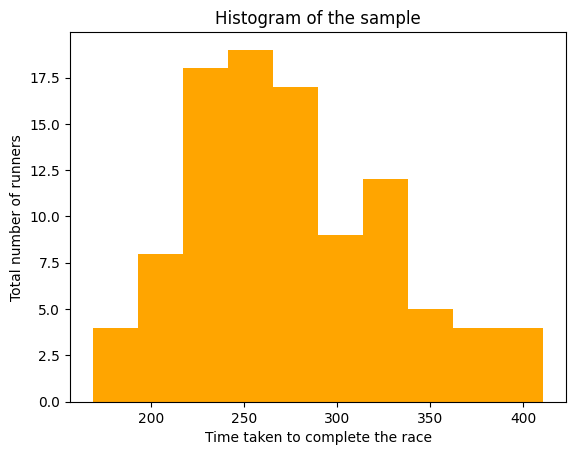

In [13]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations
import pandas as pd  # Import pandas for data manipulation
import random  # Import random for random sampling

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/Users/tbs/Downloads/bm_results2012(1).csv", encoding = "ISO-8859-1")

# Replace '-' values in the 'official' column with '0'
df['official'] = df['official'].apply(lambda val: '0' if (val == '-') else val)

# Convert the 'official' column to float type
df['official'] = df['official'].astype(float)

# Extract the 'official' column values as a list
official = list(df.official.values)

# Get a random sample of 100 values from the 'official' list
sample = random.sample(official, 100)

# Create a histogram of the sample using matplotlib
plt.hist(sample, color='Orange')

# Add title and labels to the plot
plt.title('Histogram of the sample')
plt.xlabel('Time taken to complete the race')
plt.ylabel('Total number of runners')

# Display the histogram
plt.show()


5Q) Using the Boston Marathon data, from above, create stratified samples, by gender, of 100 runners each. Create a histogram for each sample showing the sample mean, standard deviation and standard error. Include indicators of the 95% confidence level on each histogram.

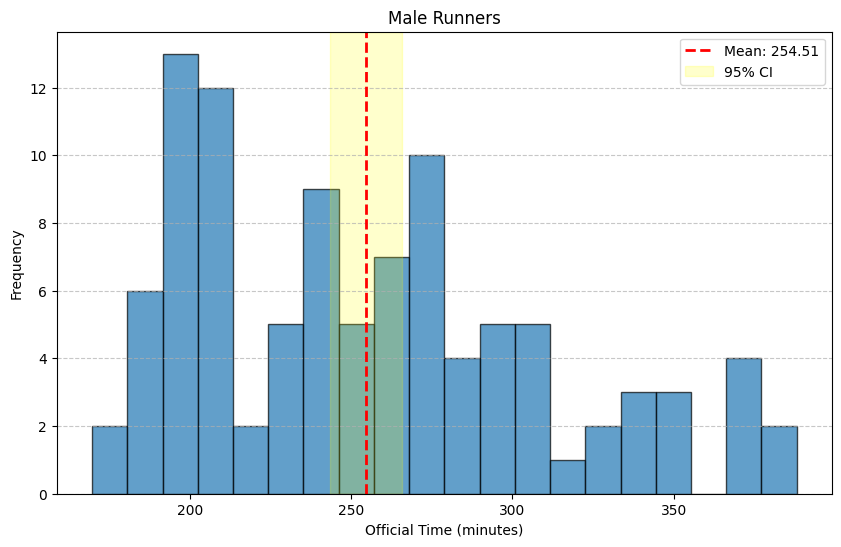

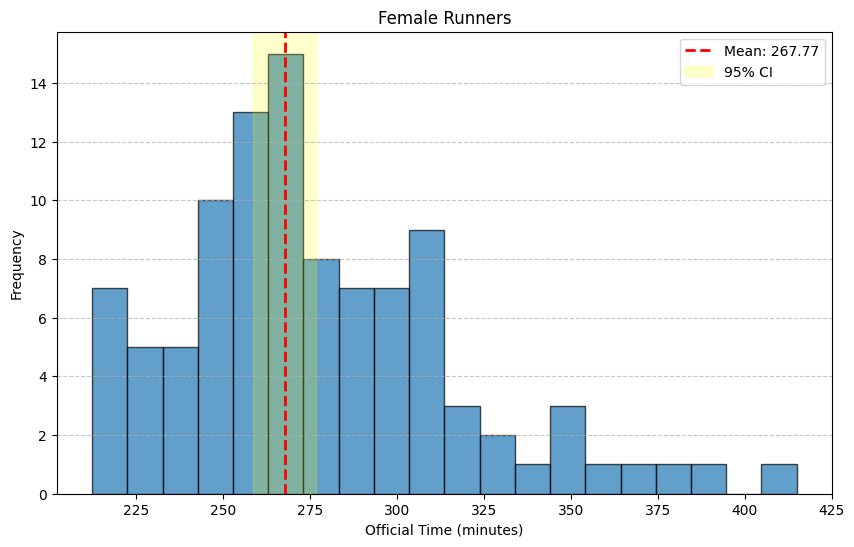

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the Boston Marathon data from the CSV file
data = pd.read_csv('/Users/tbs/Downloads/bm_results2012(1).csv')

# Convert the 'official' column to numeric (and set errors='coerce' to handle non-numeric values)
data['official'] = pd.to_numeric(data['official'], errors='coerce')

# Remove rows with missing or non-numeric values in the 'official' column
data.dropna(subset=['official'], inplace=True)

# Create stratified samples for each gender (male and female)
male_runners = data[data['gender'] == 'M']
female_runners = data[data['gender'] == 'F']

sample_size = 100

# Create a function to generate the histogram with statistics and confidence intervals
def create_histogram(sample, title):
    plt.figure(figsize=(10, 6))
    sample_mean = sample['official'].sample(sample_size).mean()
    sample_std = sample['official'].sample(sample_size).std()
    sample_sem = stats.sem(sample['official'].sample(sample_size))
    confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=sample_sem)
    
    plt.hist(sample['official'].sample(sample_size), bins=20, edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel('Official Time (minutes)')
    plt.ylabel('Frequency')
    plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
    plt.axvspan(confidence_interval[0], confidence_interval[1], alpha=0.2, color='yellow', label='95% CI')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Create histograms for each gender
create_histogram(male_runners, 'Male Runners')
create_histogram(female_runners, 'Female Runners')
